## <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
### <center> Hands-on Tutorial Day-5
### <center> Classification

**Contents**  
1. Data preprocessing in Machine Learning
2. Model fitting
3. Naive Bayes Classification
4. Logistic Regression
5. KNN
6. Comparative analysis

####Data Preprocessing

Loading libraries

In [ ]:
!pip install -q scikit-plot

In [ ]:
import sys
import io

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt

Loading dataset

In [ ]:
data = pd.read_csv("https://tinyurl.com/acm15072022")
data.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [ ]:
data.dtypes

Data preprocessing

In [ ]:
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CHURNRISK                  2066 non-null   object 
 1   GENDER                     2063 non-null   object 
 2   STATUS                     2066 non-null   object 
 3   CHILDREN                   2066 non-null   int64  
 4   ESTINCOME                  2066 non-null   float64
 5   HOMEOWNER                  2066 non-null   object 
 6   AGE                        2066 non-null   int64  
 7   TOTALDOLLARVALUETRADED     2066 non-null   float64
 8   TOTALUNITSTRADED           2066 non-null   int64  
 9   LARGESTSINGLETRANSACTION   2066 non-null   float64
 10  SMALLESTSINGLETRANSACTION  2066 non-null   float64
 11  PERCENTCHANGECALCULATION   2066 non-null   float64
 12  DAYSSINCELASTLOGIN         2066 non-null   int64  
 13  DAYSSINCELASTTRADE         2066 non-null   int64

CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64

In [ ]:
data.groupby(['CHURNRISK']).size()

CHURNRISK
High      983
Low       699
Medium    384
dtype: int64

In [ ]:
index = ['High','Medium','Low']
churn_plot = data['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',figsize=(4,4),title="Total number for occurences of churn risks")
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

Removal of unnecessary columns

In [ ]:
#Removal of unnecessary columns
data.drop(['ID'], axis=1)
data = data.drop(['ID'], axis=1)
data.head()

Data Transformation

In [ ]:
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']
print(categoricalColumns)
impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),
                                          ('onehot',onehot_categorical)])

['GENDER', 'STATUS', 'HOMEOWNER']


In [ ]:
numericalColumns = data.select_dtypes(include=[np.float,np.int]).columns
print(numericalColumns)

scaler_numerical = StandardScaler()
numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

In [ ]:
set(data.STATUS.to_list())

{'D', 'M', 'S'}

In [ ]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', 
                                            categorical_transformer, 
                                            categoricalColumns)],
                                            remainder="passthrough")
temp_data = preprocessorForCategoricalColumns.fit_transform(data)
type(temp_data)
temp_data = pd.DataFrame(temp_data)
temp_data.head(20)

In [ ]:
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', 
                                            categorical_transformer, 
                                            categoricalColumns),
                                            ('num',numerical_transformer,
                                            numericalColumns)],
                                            remainder="passthrough")

temp_data_2 = preprocessorForAllColumns.fit_transform(data)
temp_data_2 = pd.DataFrame(temp_data_2)
temp_data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.012959,-0.738588,0.281434,-1.011294,-0.010312,-1.168367,-1.168367,-0.332917,-0.602899,0.857719,-0.679273,-0.510607,Medium
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.012959,1.290924,-1.19346,1.094057,-0.790986,1.084439,1.084439,-0.723373,0.732138,0.151724,1.835463,-0.795935,Low
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.3598,0.705049,-0.053769,0.638301,-0.530761,0.659009,0.659009,-0.45471,0.732138,-1.024934,1.414322,-0.795935,Low
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.17342,0.431137,0.616638,-0.311526,-0.391974,-0.227619,-0.227619,-0.311424,0.064619,-0.789603,-0.679273,0.422898,High
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.3598,1.357483,-0.18785,1.389491,-0.877727,1.360216,1.360216,-0.812928,0.732138,-0.083608,-0.679273,1.998506,High


Label encoder

In [ ]:
features = []
features = data.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(data, columns = ['CHURNRISK']) 
label_encoder = LabelEncoder()
label = data['CHURNRISK']

label = label_encoder.fit_transform(label)
label

array([2, 1, 1, ..., 2, 1, 1])

Plotting in different ways

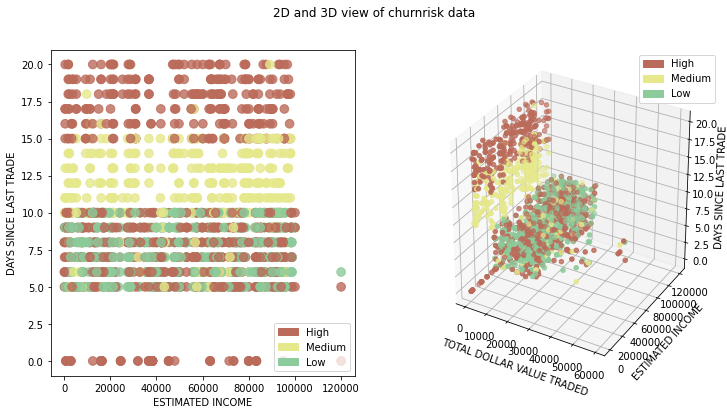

In [ ]:
area = 75
x = data['ESTINCOME']
y = data['DAYSSINCELASTTRADE']
z = data['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()

####Classification models

Splitting the data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label ,
                                                    train_size = 0.7, 
                                                    random_state=0)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(620,)

Preparation for data comparison and plotting

In [ ]:
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

In [ ]:
def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))
    
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Actual')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Predicted')

    plt.show()
    

def model_metrics(y_test,y_pred):
    print("Decoded values of Churnrisk after applying inverse of label encoder : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,
                                        text_fontsize="small",
                                        cmap='Greens',figsize=(6,4))
    plt.show()

In [ ]:
x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')

### Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_name = 'Naive Bayes Classifier'

nbClassifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),
                           ('classifier', nbClassifier)]) 

nb_model.fit(X_train,y_train)
y_pred_nb= nb_model.predict(X_test)
#for i,j in zip(y_test, y_pred_nb):
#  print(str(i)+ '\t' + str(j)+ '\n')
accuracy_score(y_test, y_pred_nb)

0.667741935483871

In [ ]:
y_pred_nb

array([2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1,
       2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1,
       2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2,

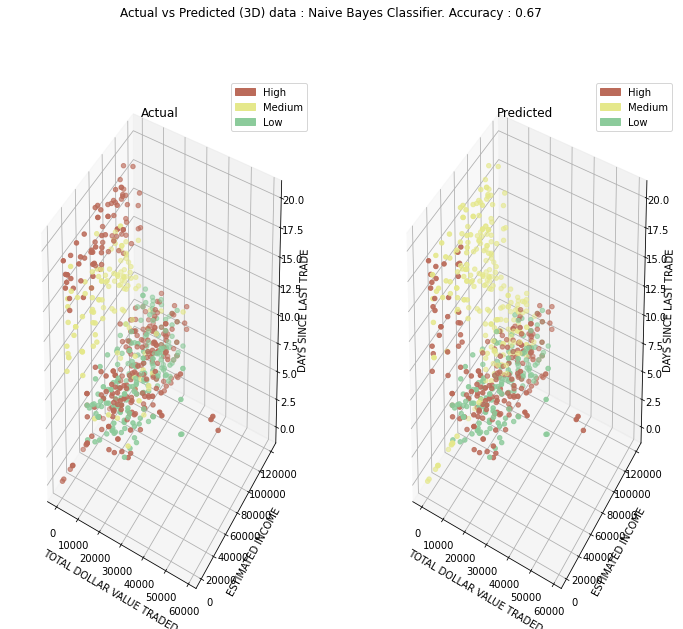

In [ ]:
three_d_compare(y_test,y_pred_nb,model_name)

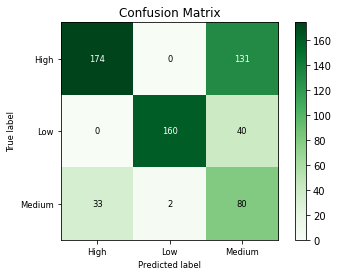

In [ ]:
y_test1 = label_encoder.inverse_transform(y_test)
y_pred_nb1 = label_encoder.inverse_transform(y_pred_nb)
#model_metrics(y_test1,y_pred_nb1)
skplt.metrics.plot_confusion_matrix(y_test1,y_pred_nb1,
                                        text_fontsize="small",
                                        cmap='Greens',figsize=(6,4))
plt.show()
#y_pred_nb1

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_name = "Logistic Regression Classifier"

logisticRegressionClassifier = LogisticRegression(random_state=0,
                                      solver='lbfgs',max_iter=1000)
lrc_model = Pipeline(steps=[('preprocessor', preprocessorForCategoricalColumns),
                            ('classifier', logisticRegressionClassifier)]) 

lrc_model.fit(X_train,y_train)
y_pred_lrc = lrc_model.predict(X_test)
accuracy_score(y_test, y_pred_lrc)

0.9548387096774194

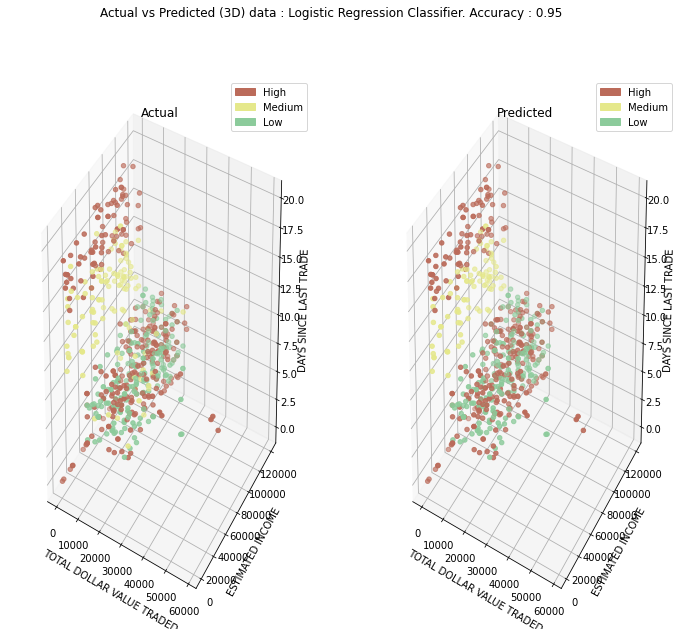

In [ ]:
three_d_compare(y_test,y_pred_lrc,model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


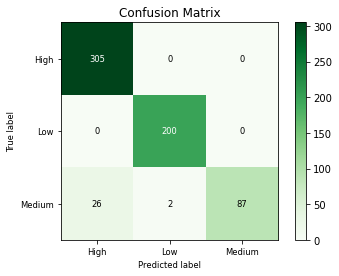

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_lrc = label_encoder.inverse_transform(y_pred_lrc)
model_metrics(y_test,y_pred_lrc)

### KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_name = "K-Nearest Neighbor Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2)
#knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric='euclidean', p=2)
knn_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),
                            ('classifier', knnClassifier)]) 

knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.8806451612903226

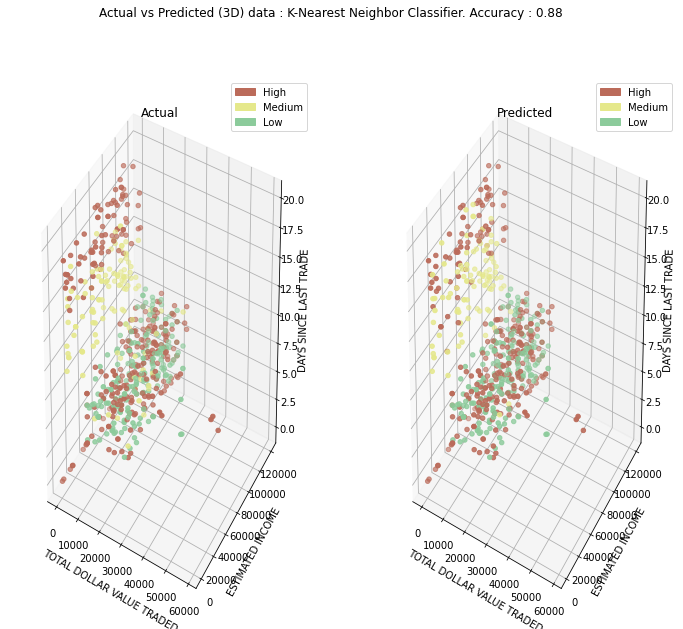

In [ ]:
#y_test = label_encoder.transform(y_test)
three_d_compare(y_test,y_pred_knn,model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


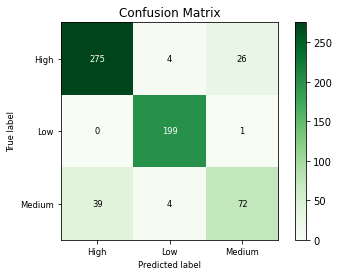

In [ ]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_knn = label_encoder.inverse_transform(y_pred_knn)
model_metrics(y_test,y_pred_knn)

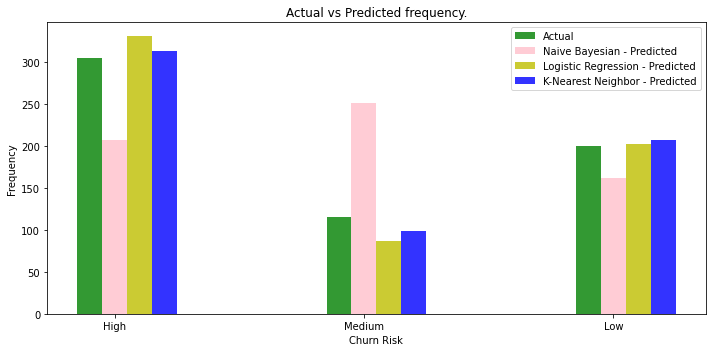

In [ ]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_knn, return_counts=True)
frequency_predicted_knn = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_lrc, return_counts=True)
frequency_predicted_lrc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_nb, return_counts=True)
frequency_predicted_nb = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects2 = plt.bar(index + bar_width, frequency_predicted_nb, bar_width,
alpha=opacity,
color='pink',
label='Naive Bayesian - Predicted')

rects3 = plt.bar(index + bar_width*2, frequency_predicted_lrc, bar_width,
alpha=opacity,
color='y',
label='Logistic Regression - Predicted')

rects4 = plt.bar(index + bar_width*3, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()